In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import h5py
import os
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

PATH = "data\\model_out\\"

MODELNAME = ["01", "02", "03", "04", "05", "06", "07", "08", "12", "13", "14", "15", "16", "17", "18", "23", "24", "25", "26", "27", "28", "34", "35", "36", "37", "38",
             "45", "46", "47", "48", "56", "57", "58", "67", "68", "78"]
MODELRANGES = [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [2, 3], [2, 4], [2, 5],
               [2, 6], [2, 7], [2, 8], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [4, 5], [4, 6], [4, 7], [4, 8], [5, 6], [5, 7], [5, 8], [6, 7], [6, 8], [7, 8]]

DATASET = 'data\\dataset.h5'
CL = ['GRA', 'HIS', 'IN', 'STUD', 'MIX', 'OUT_C', 'OUT_H', 'OTHER', 'SPE']
CL_DICT = {0: "Graphics [GRA]",
           1: "Historic [HIS]",
           2: "Indoor [IN]",
           3: "Indoor studio of CZTV [STUD]",
           4: "Mix [MIX]",
           5: "Outdoor country [OUT_C]",
           6: "Outdoor human made [OUT_H]",
           7: "Scene type other [OTHER]",
           8: "Speech [SPE]"}

bg_color = 'white'

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


Type:  01
acc:  0.8851351351351351


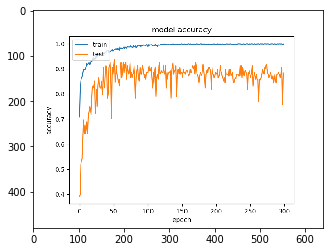

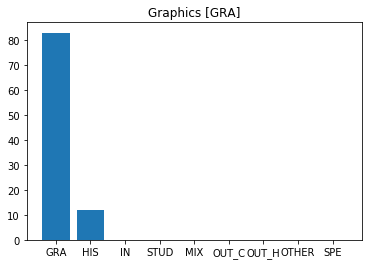

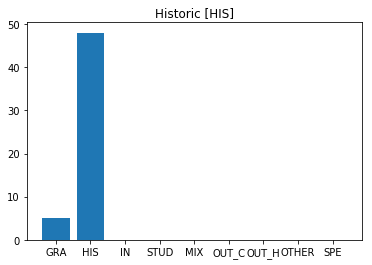

Type:  02
acc:  0.9393139841688655


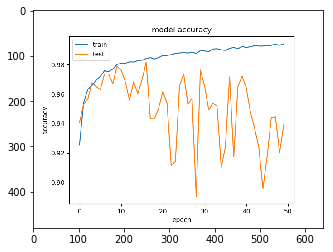

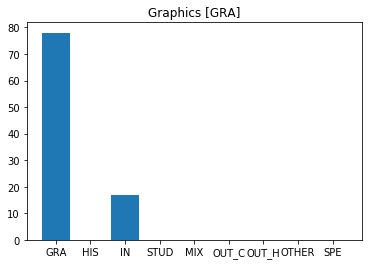

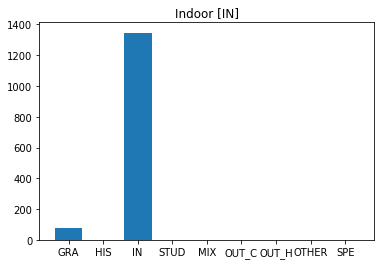

Type:  03
acc:  0.9809523809523809


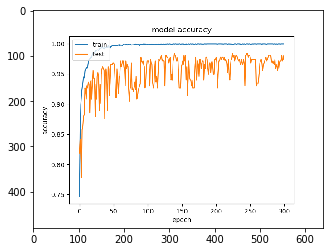

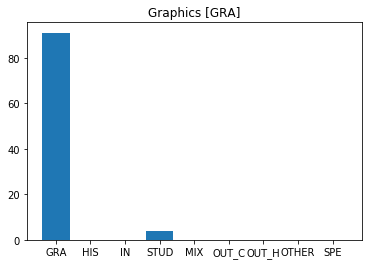

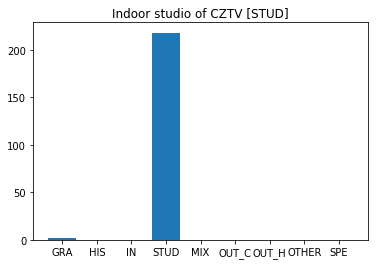

Type:  04
acc:  0.9591836734693877


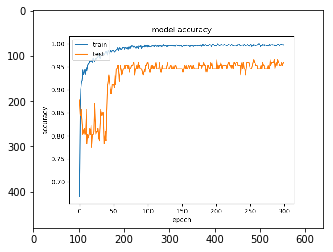

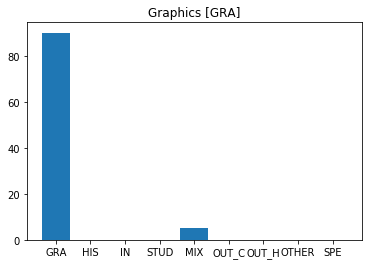

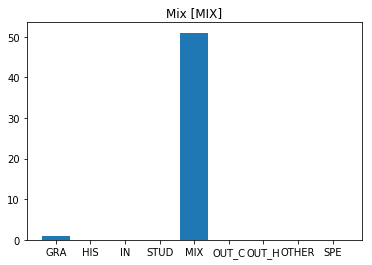

Type:  05
acc:  0.8688524590163934


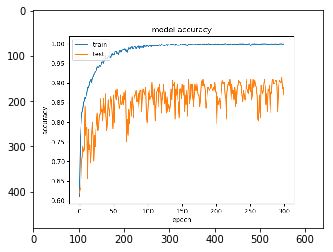

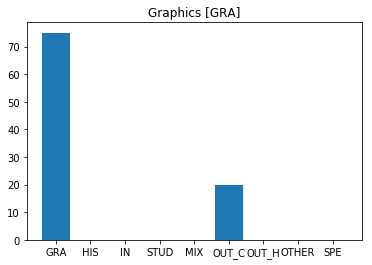

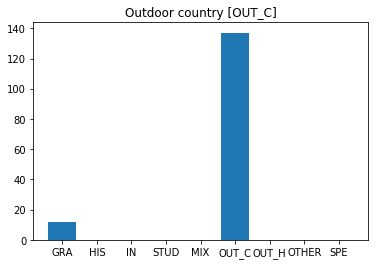

Type:  06
acc:  0.9723282442748091


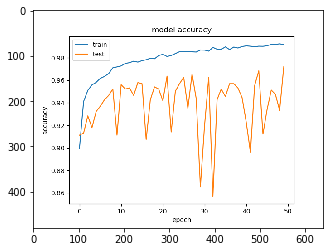

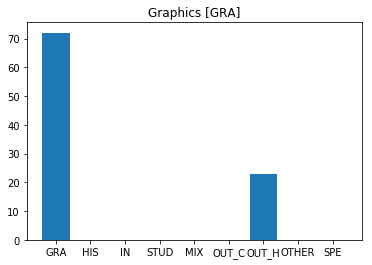

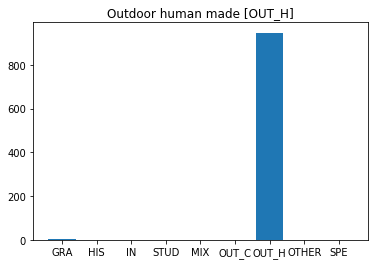

Type:  07
acc:  0.810126582278481


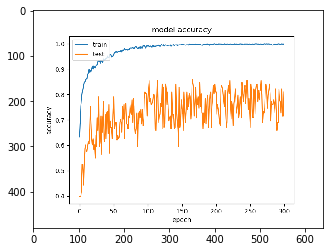

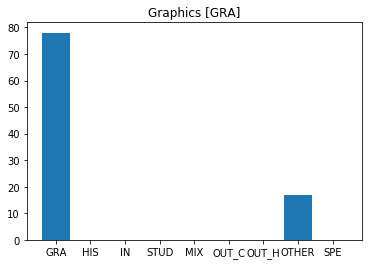

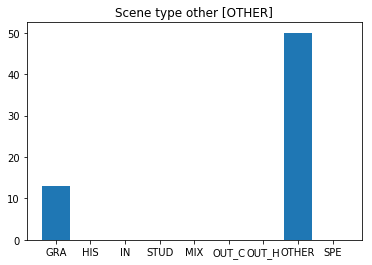

Type:  08
acc:  0.9316239316239316


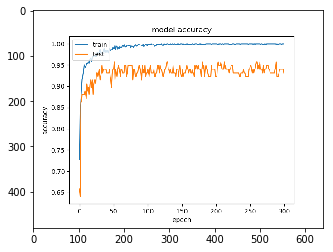

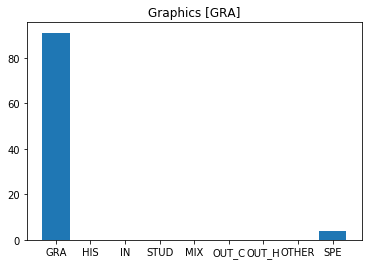

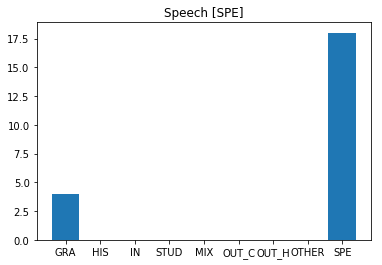

Type:  12
acc:  0.9335142469470827


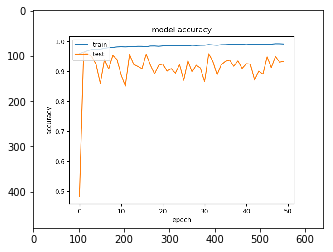

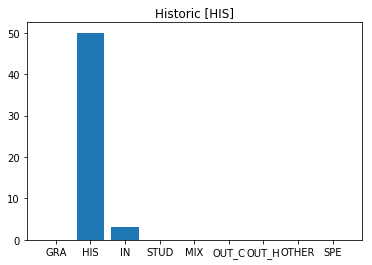

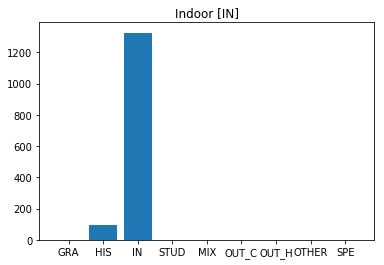

Type:  13
acc:  0.9633699633699634


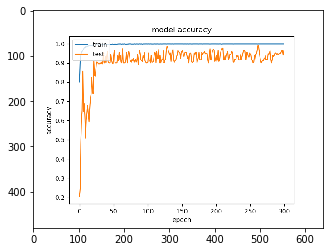

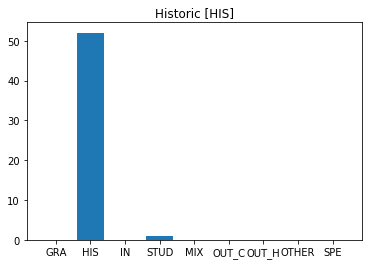

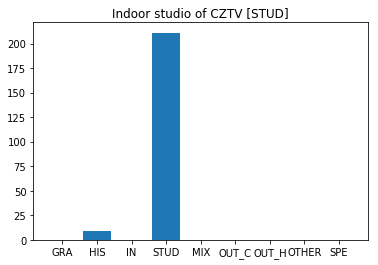

Type:  14
acc:  1.0


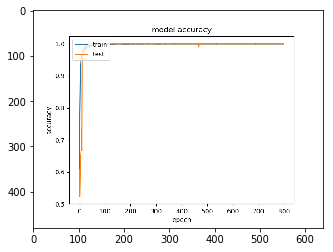

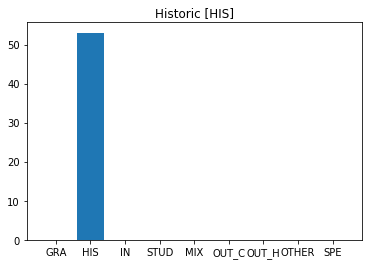

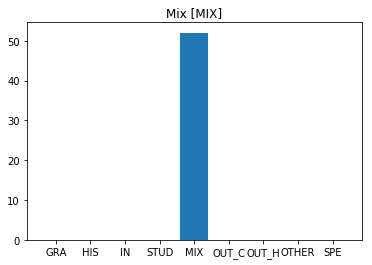

Type:  15
acc:  0.7376237623762376


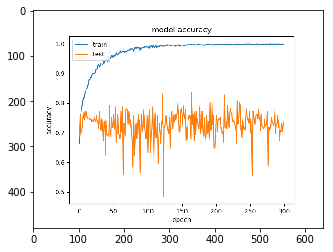

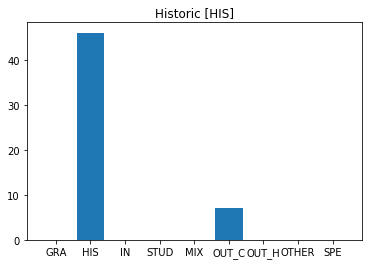

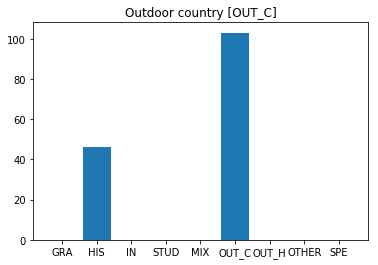

Type:  16
acc:  0.885685884691849


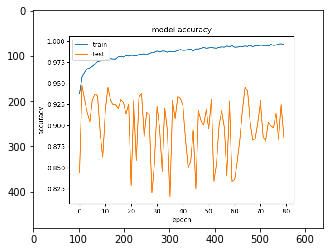

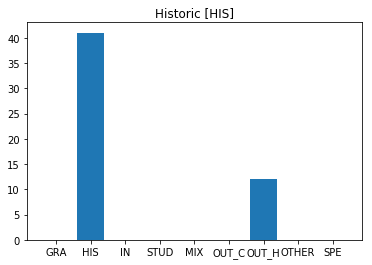

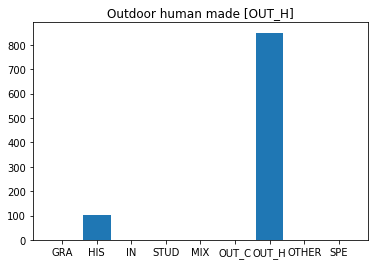

Type:  17
acc:  0.75


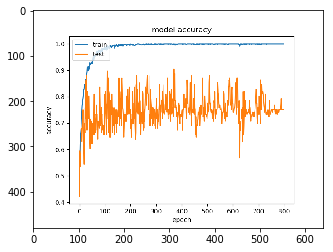

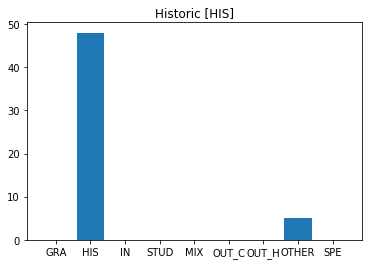

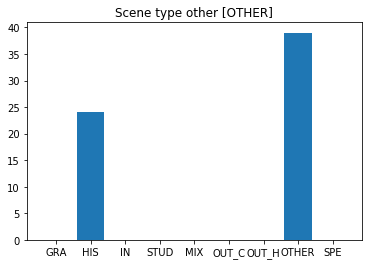

Type:  18
acc:  0.88


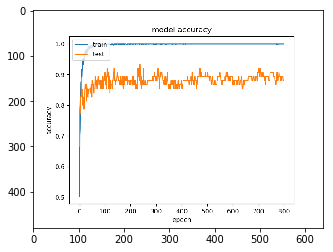

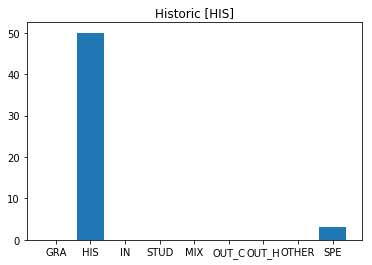

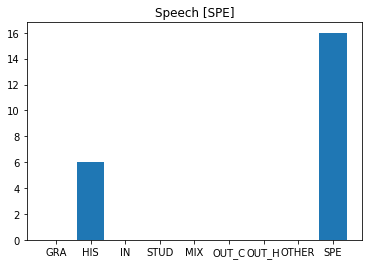

Type:  23
acc:  0.8677635588056063


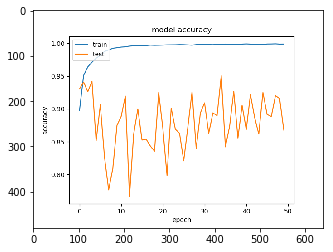

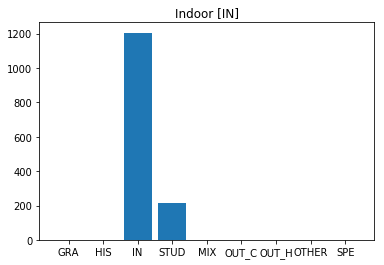

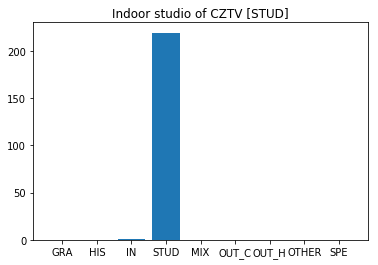

Type:  24
acc:  0.9945689069925322


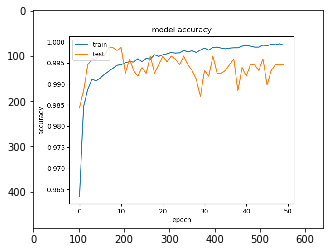

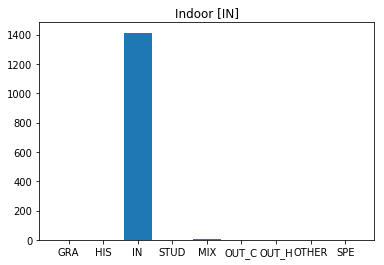

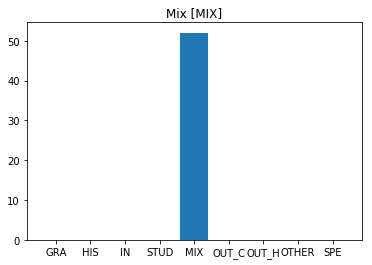

Type:  25
acc:  0.8273885350318472


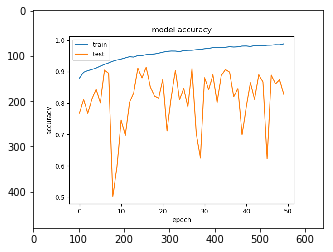

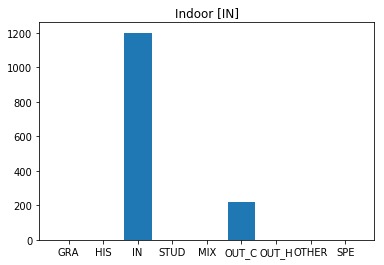

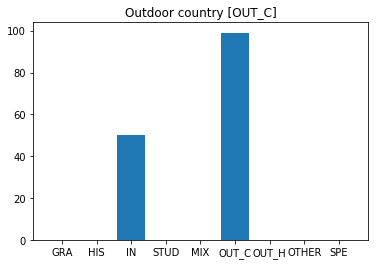

Type:  26
acc:  0.7653748946925021


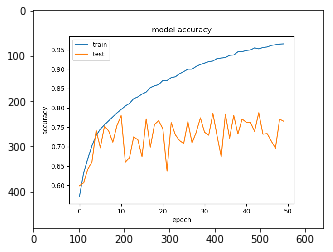

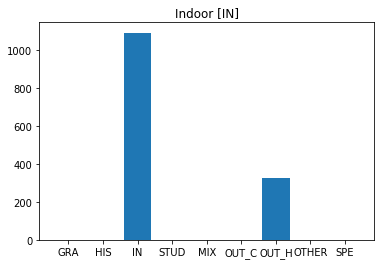

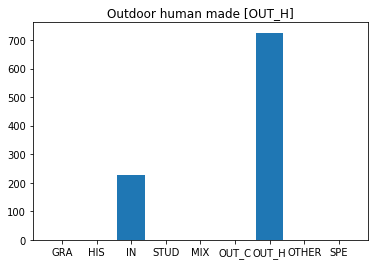

Type:  27
acc:  0.9299191374663073


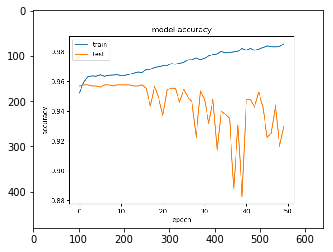

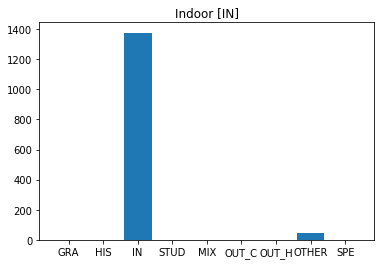

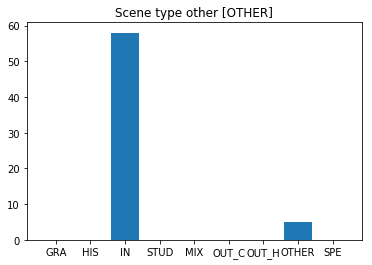

Type:  28
acc:  0.9861399861399861


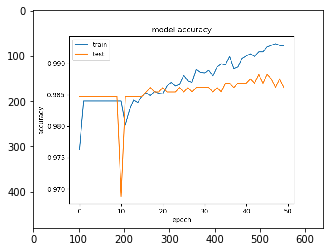

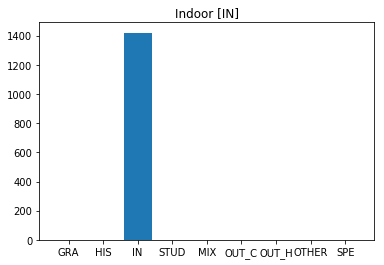

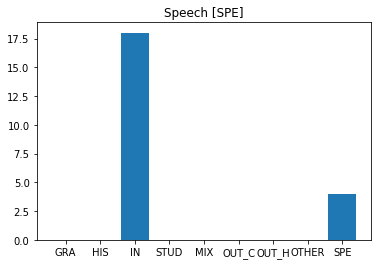

Type:  34
acc:  0.9926470588235294


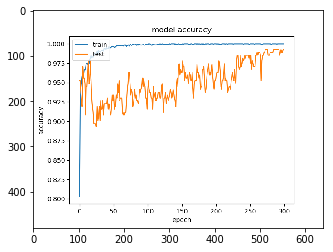

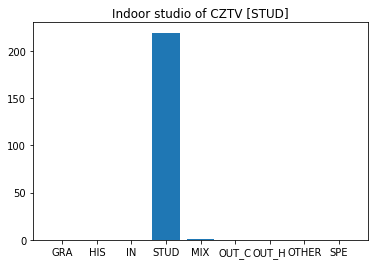

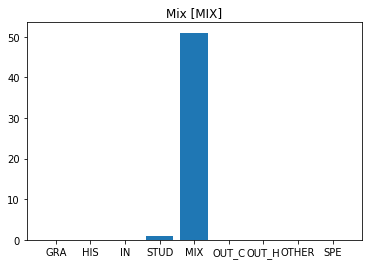

Type:  35
acc:  0.989159891598916


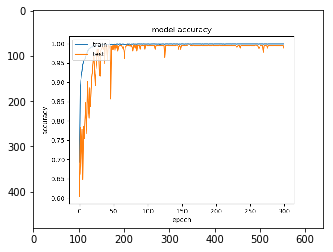

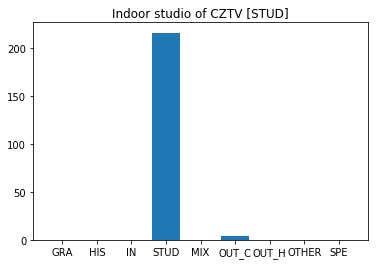

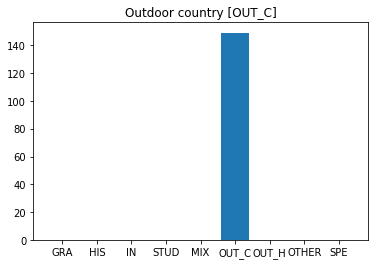

Type:  36
acc:  0.9820971867007673


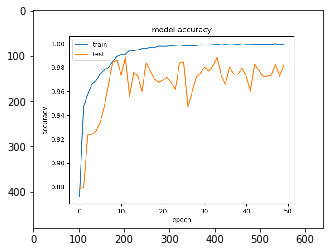

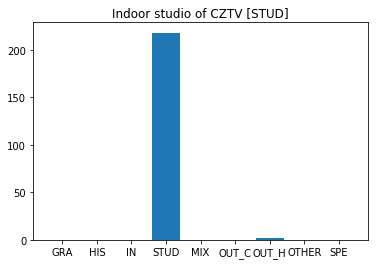

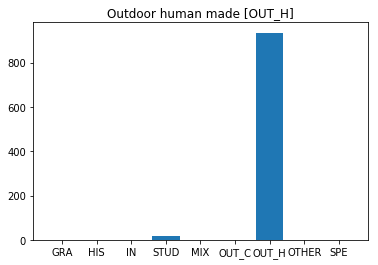

Type:  37
acc:  0.9893992932862191


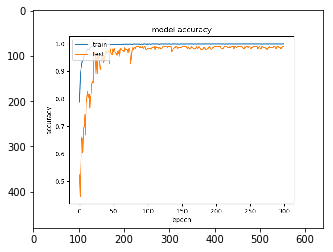

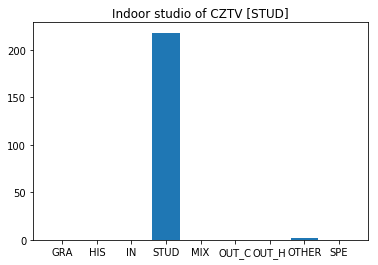

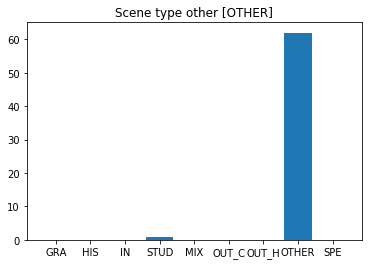

Type:  38
acc:  0.9917355371900827


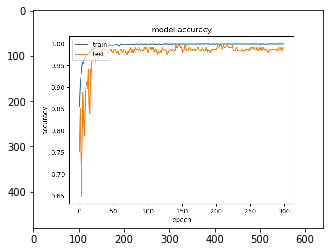

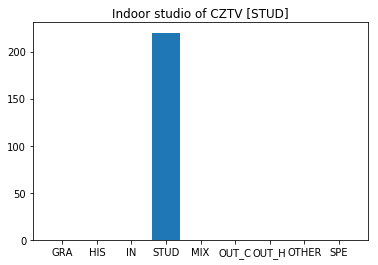

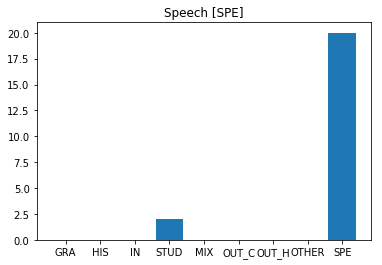

Type:  45
acc:  1.0


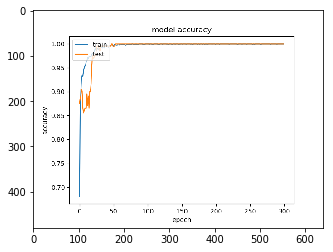

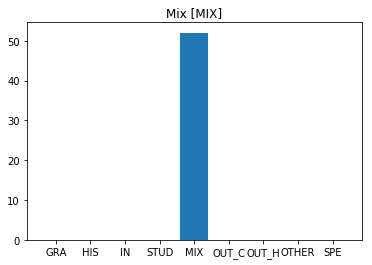

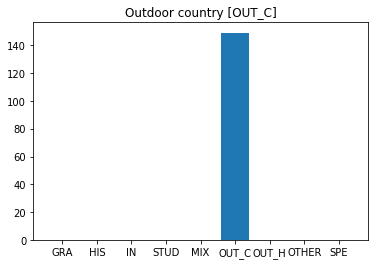

Type:  46
acc:  0.9960199004975124


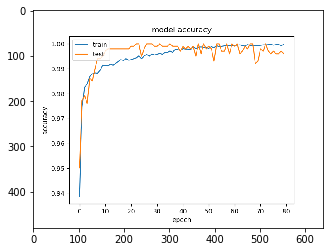

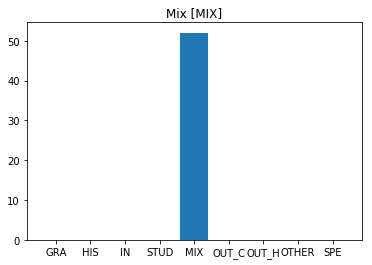

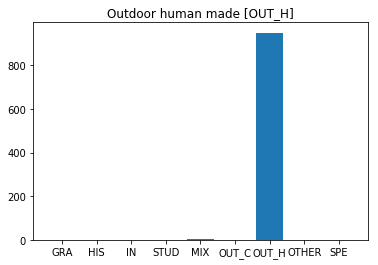

Type:  47
acc:  0.9565217391304348


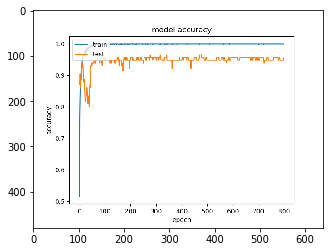

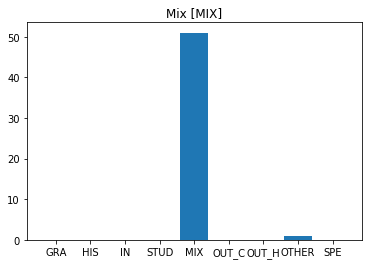

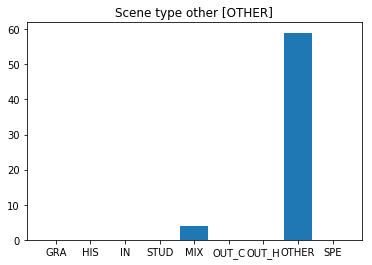

Type:  48
acc:  1.0


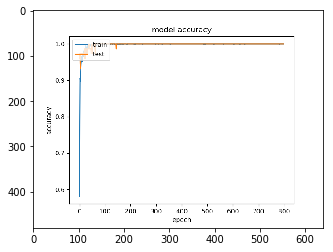

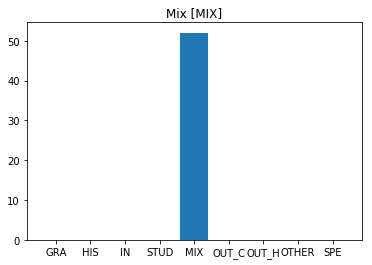

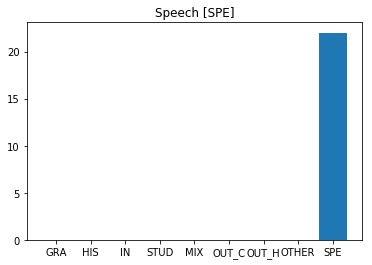

Type:  56
acc:  0.7831215970961888


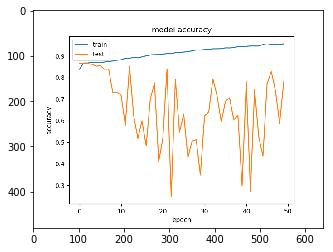

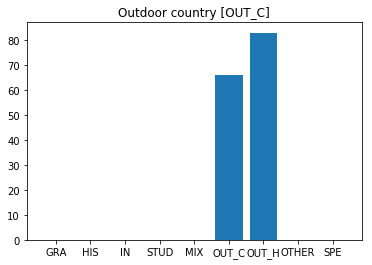

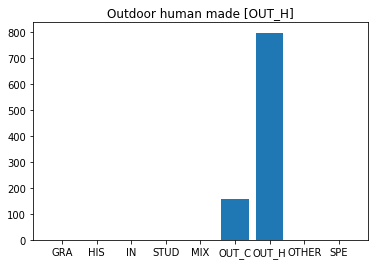

Type:  57
acc:  0.7216981132075472


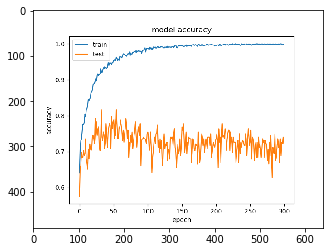

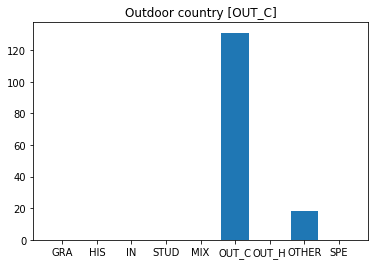

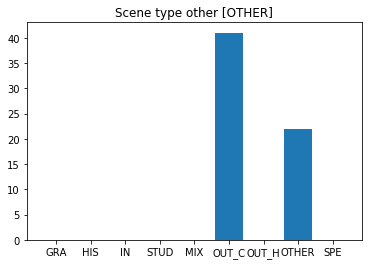

Type:  58
acc:  0.9590643274853801


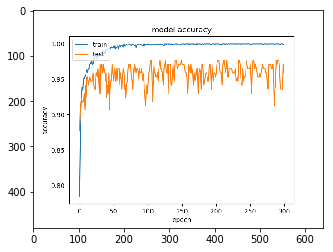

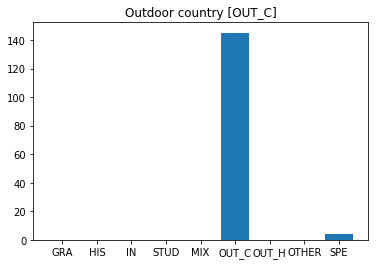

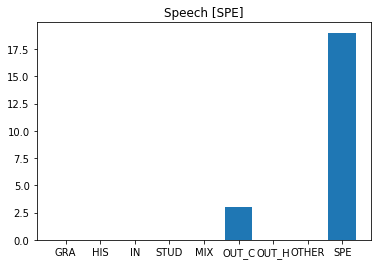

Type:  67
acc:  0.9183070866141733


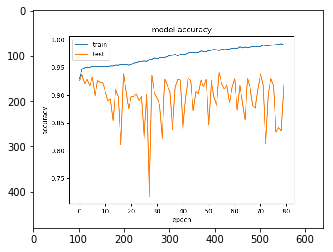

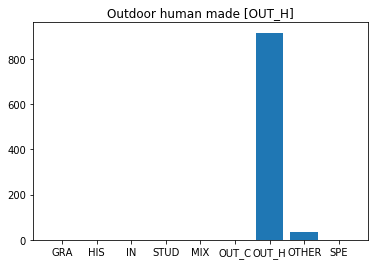

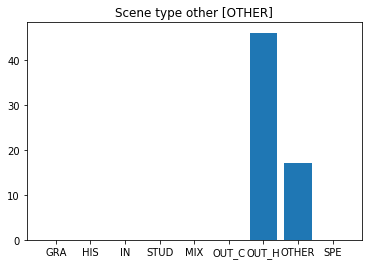

Type:  68
acc:  0.9364102564102564


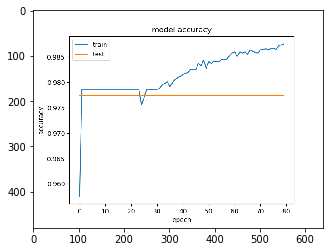

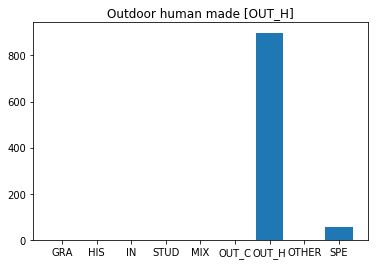

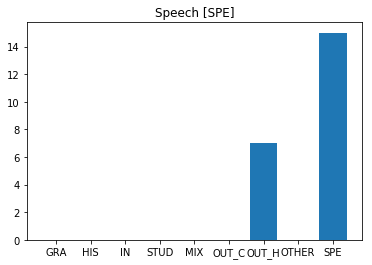

Type:  78
acc:  0.6470588235294118


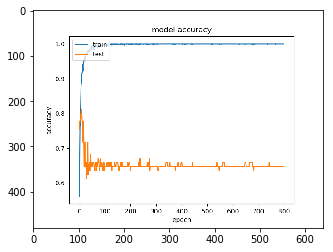

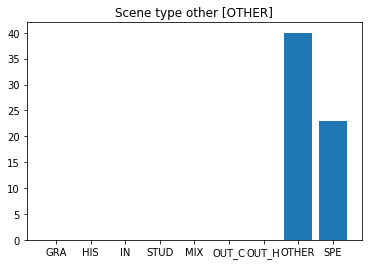

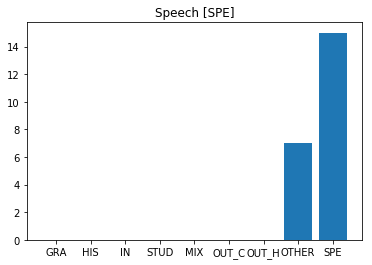

In [2]:
dataset = h5py.File(DATASET, 'r')
x_test = dataset["test_imgs"]
num_clusters = 0
if "cluster_names" in dataset.keys():
    num_clusters = len(dataset["cluster_names"])
else:
    num_clusters = max(dataset["test_imgs"][...]) + 1
y_test = keras.utils.to_categorical(dataset["test_clusters"], num_clusters)
shape = (len(dataset["test_imgs"][0]),
         len(dataset["test_imgs"][0][0]),
         len(dataset["test_imgs"][0][0][0]))

for j, name in enumerate(MODELNAME):
    model = keras.models.load_model(PATH + "build_" + name + ".h5")
        
    # evaluate
    output_pred = model.predict(x_test)
    
    sucess_false_matrix = [[0, 0, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 0, 0, 0, 0]]
    den = 0
    for i in range(0, len(y_test)):
        network_say = np.argmax(output_pred[i])
        teacher_say = np.argmax(y_test[i])
        if teacher_say in MODELRANGES[j]:
            den += 1
        sucess_false_matrix[teacher_say][network_say] += 1
    
    s = 0
    for i in MODELRANGES[j]:
        s += sucess_false_matrix[i][i]
        
    print("Type: ", name)
    print("acc: ", s / den)
    img = mpimg.imread(PATH + 'acc_build_' + name + '.png')
    plt.imshow(img)
    for i in MODELRANGES[j]:
        plt.figure(facecolor=bg_color)
        plt.bar(CL, sucess_false_matrix[i])
        plt.title(CL_DICT[i])
        plt.show()
dataset.close()